# Local Binary pattern

Featured discussion. 


In [9]:
# <libraries>
from skimage import io
from skimage import util
from skimage.feature import local_binary_pattern
import numpy as np
#import cv2
import matplotlib.pyplot as plt

%matplotlib inline

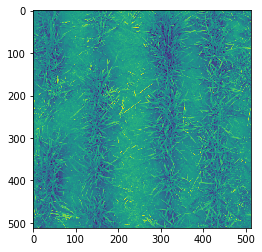

In [14]:
# Load an image
original_image   = io.imread('images/labelData/finger_grass_3.png',as_gray=True) # load the data in gray scale
plt.imshow(original_image)

Local binary pattern takes a predefined gird size and caculate binary encoded value to the center of the grid based on the cells arround the center cell.



In [36]:
# creating a 9x9 dummy array to identify the characteristics of the local binary pattern 
dummy_image = np.array([[5, 8, 1],[5, 4, 1,],[3, 7, 2]])

rows,cols = dummy_image.shape # shape

#visualize the array
print(dummy_image)
print("______________")

# Identiy the center cell
middle_cell = dummy_image[1,1]

for i in range(rows):
    for j in range(cols):
        if(middle_cell >= dummy_image[i,j]):
            print(i,j,"bigger")
            dummy_image[i,j] = 1
        elif((middle_cell < dummy_image[i,j])):
            print(i,j,"smalller")
            dummy_image[i,j] = 0

# Assing 2 for the center for identification             
dummy_image[1,1] = 2 # center

[[5 8 1]
 [5 4 1]
 [3 7 2]]
______________
0 0 smalller
0 1 smalller
0 2 bigger
1 0 smalller
1 1 bigger
1 2 bigger
2 0 bigger
2 1 smalller
2 2 bigger


In [38]:
print("Number 2 is the center array")
dummy_image

Number 2 is the center array


array([[0, 0, 1],
       [0, 2, 1],
       [1, 0, 1]])

In [40]:
c = (2**(0))* dummy_image[0,0]+(2**(1))* dummy_image[0,1]+(2**(2))* dummy_image[0,2]+(2**(3)) * dummy_image[1,2]+(2**(4)) * dummy_image[2,2]+(2**(5))*dummy_image[2,1]+(2**(6))*dummy_image[2,0]+(2**(7)) * dummy_image[1,0]
print("center value", c)

center value 92



This project we will be using  skiimage inbuilt local_binary_pattern funtion for analysis.  

In [21]:
print(local_binary_pattern.__doc__)

Gray scale and rotation invariant LBP (Local Binary Patterns).

    LBP is an invariant descriptor that can be used for texture classification.

    Parameters
    ----------
    image : (N, M) array
        Graylevel image.
    P : int
        Number of circularly symmetric neighbour set points (quantization of
        the angular space).
    R : float
        Radius of circle (spatial resolution of the operator).
    method : {'default', 'ror', 'uniform', 'var'}
        Method to determine the pattern.

        * 'default': original local binary pattern which is gray scale but not
            rotation invariant.
        * 'ror': extension of default implementation which is gray scale and
            rotation invariant.
        * 'uniform': improved rotation invariance with uniform patterns and
            finer quantization of the angular space which is gray scale and
            rotation invariant.
        * 'nri_uniform': non rotation-invariant uniform patterns variant
            

## image output from local_binary_pattern function 

In [24]:
radius = 1
point_count = 8 * radius
Method = 'UNIFORM'
ldp_test = local_binary_pattern(original_image,point_count,radius,Method)
print(ldp_test)

[[3. 2. 5. ... 5. 0. 2.]
 [4. 2. 9. ... 9. 4. 5.]
 [2. 1. 8. ... 5. 6. 4.]
 ...
 [4. 3. 1. ... 4. 8. 9.]
 [5. 4. 1. ... 3. 6. 0.]
 [0. 5. 3. ... 5. 9. 1.]]


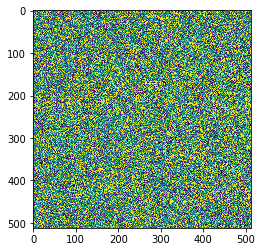

In [41]:
plt.imshow(ldp_test)

## Lets start from croping small values from picture

In [42]:
# Taking a small part from the picture
crop = original_image[0:3,0:3]
print(crop)

[[0.39415686 0.42887059 0.40757333]
 [0.40982118 0.45015294 0.44512235]
 [0.45911216 0.47593725 0.43534471]]


In [44]:
# Find the ldp from the by using skiimage local_binary_pattern
method = 'UNIFORM'
radius = 1
point_count = 8 * radius
ldp = local_binary_pattern(crop, point_count, radius, method)
print(ldp)

[[3. 2. 3.]
 [4. 2. 2.]
 [1. 0. 3.]]


In [49]:
np_crop = np.array(crop) # convert to numpy array
rows,cols = np_crop.shape # Getting the sahpe of the array

# [1,1] carries the middle cell

middle_cell = np_crop[1,1]
for i in range(rows):
    for j in range(cols):
        if(middle_cell == np_crop[i,j] ):
            print(i,j,"same")
            np_crop[i,j] = 1
        elif(middle_cell >= np_crop[i,j]):
            print(i,j,"bigger")
            np_crop[i,j] = 0
        elif((middle_cell < np_crop[i,j])):
            print(i,j,"smalller")
            np_crop[i,j]

0 0 bigger
0 1 bigger
0 2 bigger
1 0 bigger
1 1 same
1 2 bigger
2 0 smalller
2 1 smalller
2 2 bigger


**Some of the corner values are incorrect due to local_binary_pattern bilinear interpoplation pattern to assign values to the corner  values. It is being use to get more uniform values to each corner cells**

<img style="float:left" src="images/other/bilinear_interpolation_circle.PNG" /><br>
<img style="float:left" src="images/other/bilinear_interpolation.PNG" />



<h3>Bilinear interpoplation</h3>

In [64]:
# This is code snipet how bilinear interpoplation works
w_cen  =  (1-1/np.sqrt(2))**2  # Weights
w_diag  =  (1/np.sqrt(2))**2
w_orto  =  (1-1/np.sqrt(2))*(1/np.sqrt(2))

def bilinear_interpoplation(i_cen, i_diag, i_hor, i_ver):
    return i_cen*w_cen + i_diag*w_diag + i_hor*w_orto + i_ver*w_orto

def circular_neighbourhood(x):
    [I7, I6, I5] = x[0, :]
    [I0, Ic, I4] = x[1, :]
    [I1, I2, I3] = x[2, :]
    I7i = bilinear_interpoplation(Ic, I7, I0, I6)
    I5i = bilinear_interpoplation(Ic, I5, I4, I6)
    I3i = bilinear_interpoplation(Ic, I3, I4, I2)
    I1i = bilinear_interpoplation(Ic, I1, I0, I2)
    interpolated = np.array([[I7i, I6, I5i], 
                             [ I0, Ic,  I4], 
                             [I1i, I2, I3i]])
    return interpolated

def binary_pattern(x):
    return np.where(x >= x[1, 1], 1, 0)

def display_lbps(patch):
    interpolated = circular_neighbourhood(patch)
    print('Patch =')
    print(patch)
    print('LBP of patch =')
    print(binary_pattern(patch))
    print('Interpolated patch =')
    print(interpolated)
    print('LBP of interpolated patch =')
    print(binary_pattern(interpolated))

display_lbps(crop[0:3, 0:3])


Patch =
[[0.39415686 0.42887059 0.40757333]
 [0.40982118 0.45015294 0.44512235]
 [0.45911216 0.47593725 0.43534471]]
LBP of patch =
[[0 0 0]
 [0 1 0]
 [1 1 0]]
Interpolated patch =
[[0.4093942  0.42887059 0.42341355]
 [0.40982118 0.45015294 0.44512235]
 [0.45161967 0.47593725 0.44704706]]
LBP of interpolated patch =
[[0 0 0]
 [0 1 0]
 [1 1 0]]


Then we are using kullback leibler to identy the divergence of two histograms which we create from the lbp function.

<h3>kullback leibler divergence reviced (KLD)</h3>

- It measurse how one probability distributution is different from the
second one 
- Its also called as  relative entropy

In [57]:
def kullback_leibler_divergence(p_samples, q_samples):
    """
    This function would calculate divergence from two vectors from a  samples from distributions
    Args:
        param1 (p) : vector1  : list
        param2 (q) : vector2  : list
        
    Retrun : 
        Divergence 
    """
    # convert to numpy array
    p = np.asarray(p_samples)
    q = np.asarray(q_samples)
    filt = np.logical_and(p != 0, q != 0) # both p and q needs to be true return true 
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))



kullback_leibler_divergenc example.

In [62]:
# All same values
p = [0.60,0.15,0.05]
q = [0.60,0.15,0.05]

print("Same distribution           : ",kullback_leibler_divergence(p,q))
p = [0.20,0.40,0.50]
q = [0.60,0.15,0.05]

print("Differences in distribution :",kullback_leibler_divergence(p,q))


Same distribution           :  0.0
Differences in distribution : 1.9099865470109874


This calculation show that when the divergence increases, it increases the output of kullback leibler divergence.

**Now the local binary pattern in two crops from the image loaded.**

In [71]:
# settings for LBP
radius   = 1
n_points = 8 * radius
METHOD   = 'UNIFORM'

def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

# crop 1
crop_1     = original_image[0:3,0:3]
crop_1_ldp = local_binary_pattern(crop_1, n_points, radius, METHOD)

crop_2     = original_image[4:7,4:7]
crop_2_ldp = local_binary_pattern(crop_2, n_points, radius, METHOD)




n_bins      = int(crop_1_ldp.max() + 1)

# create histograms from lbp function 
hist, _     = np.histogram(crop_1_ldp, density=True, bins=n_bins, range=(0, n_bins))
ref_hist, _ = np.histogram(crop_2_ldp, density=True, bins=n_bins,range=(0, n_bins))

divergence       = kullback_leibler_divergence(hist, ref_hist)

divergence

0.43609027817842005

In [72]:
# This function is used aid to create the histograms 
# histogram is a bar chart where y axis contains the frequency of a variable
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),facecolor='0.5') # ravel() : flattening the array

crop1 image
[[3. 2. 3.]
 [4. 2. 2.]
 [1. 0. 3.]]
crop2 image
[[3. 4. 0.]
 [4. 2. 5.]
 [1. 0. 2.]]


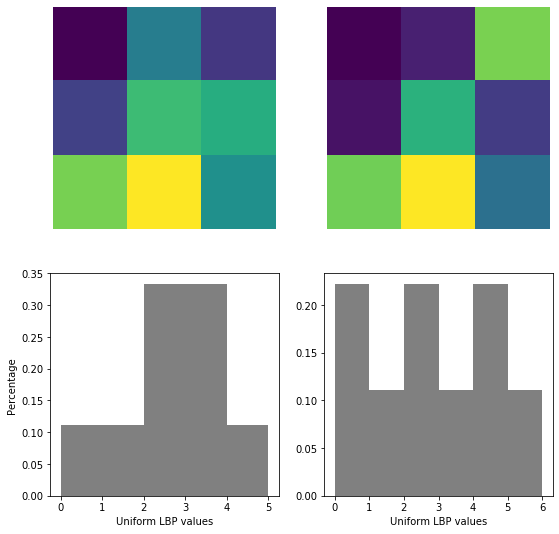

In [73]:
# plot histograms of LBP of textures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(9, 9))

print("crop1 image")
print(crop_1_ldp)

print("crop2 image")
print(crop_2_ldp)


ax1.imshow(crop_1)
ax1.axis('off')
hist(ax3, crop_1_ldp)
ax3.set_ylabel('Percentage')
ax3.set_xlabel('Uniform LBP values')

ax2.imshow(crop_2)
ax2.axis('off')
hist(ax4, crop_2_ldp)
ax4.set_xlabel('Uniform LBP values')


plt.show()

**References** 

>[PeterPeter 7511 silver badge77 bronze badges, Emmanuelle GouillartEmmanuelle Gouillart 59133 silver badges33 bronze badges & TonechasTonechas 9, 1966. Why does the local_binary_pattern function in scikit-image provide same value for different patterns? Stack Overflow. Available at: https://stackoverflow.com/questions/39011167/why-does-the-local-binary-pattern-function-in-scikit-image-provide-same-value-fo [Accessed May 6, 2020]. ] (https://stackoverflow.com/questions/39011167/why-does-the-local-binary-pattern-function-in-scikit-image-provide-same-value-fo)